# Queue

- 선형큐

- 원형큐

- 우선순위 큐

- 큐의 활용 : 버퍼

- BFS

- BFS 예제

## 큐

    - 스택과 마찬가지로 삽입과 삭제의 위치가 제한적인 자료구조

    - 선입선출구조(FIFO : First In First Out)

    - Enqueue / Dequeue

enqueue(item) : 큐의 rear에 원소를 삽입하는 연산

dequeue() : 큐의 front에서 원소를 삭제하고 반환

isEmpty() : 큐가 공백인지 아닌지 확인

isFull() : 큐가 포화상태인지 확인

qpeak() : 큐의 front 원소를 삭제 없이 반환하는 연산

<br>

#### 연산과정 예시

1. 공백 큐 생성

    - 초기값 : front = rear = -1
    
    <br>

2. 원소 A 삽입 : enqueue()

    ```python
    rear += 1       # rear = 0, front = -1
    Queue[rear] = A
    ```

3. 원소 B 삽입 : enqueue()

    ```python
    rear += 1       # rear = 1, front = -1
    Queue[rear] = B
    ```

4. 원소 반환/삭제 : dequeue()

    ```python
    front += 1      # rear = 1, front = 0
    temp = Queue[front]
    # temp = Queue.pop(0)
    ```

5. 원소 반환/삭제 : dequeue()

    ```python
    front += 1      # rear = 1, front = 1
    temp = Queue[front]
    # temp = Queue.pop(0)
    ```

<br>

## 선형 큐

- 1차원 배열을 이용한 큐

    큐의 크기 = 배열의 크기

    front : 저장된 첫번재 원소의 인덱스

    rear : 저장된 마지막 원소의 인덱스

- 상태표현 

    - 초기상태 : front = rear = -1

    - 공백상태 : front == rear

    - 포화상태 : rear == n - 1(n : 배열의 크기, n - 1 : 배열의 마지막 인덱스)

<br>

### 삽입(Enqueue(item))

- 마지막 원소 뒤에 새로운 원소를 삽입하기 위해

    1. rear 값을 하나 증가시켜 새로운 원소를 삽입할 자리를 마련

    2. 그 인덱스에 해당하는 배열 원소 Q[rear]에 item을 저장

    ```python
    def enqueue(item):
        global rear
        if isFull():
            print('Full')
        else:
            rear += 1
            Q[rear] = item
    ```

<br>

### 삭제(Dequeue())

- 가장 앞에 있는 원소를 삭제하기 위해

    1. front 값을 하나 증가시켜 큐에 남아있게 될 첫번째 원소 이동

    2. 새로운 첫번째 원소를 반환함으로써 삭제와 동일한 기능을 한다.

    ```python
    def dequeue():
        global front
        if isEmpty():
            return 'Empty!!'
        else:
            front += 1
            return Q[front]
    ```

<br>

### 공백상태 및 포화상태(isEmpty() / isFull())

- 공백상태 : front == rear

- 포화상태 : rear == n - 1

```python
    def isEmpty():
        return front == rear

    def isFull():
        return rear == len(Q) - 1
```

<br>

### 검색(qpeak())

- 가장 앞에 있는 원소를 검색하여 반환

- 현재 front의 한자리 뒤(front + 1)에 있는 원소(Queue 내부의 첫번째 원소)를 반환

```python
def qpeak():
    if isEmpty(): return
    else:
        return Q[front + 1]
```

<br>

선형 큐 이용 시 문제점 : 배열의 앞부분을 활용할 수 있는 공간이 남는데도 불구하고 사용을 못하게 된다.

## 원형 큐

- 1차원 배열을 사용하되, 논리적으로는 배열의 처음과 끝이 연결되어 원형 형태의 큐를 이룬다고 가정하고 사용

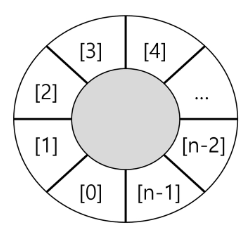

- 초기 공백 상태 : front = rear = 0

    - -1이 아님에 주의한다 !!

- 인덱스의 순환

    - front와 rear의 위치가 배열의 마지막 인덱스인 n - 1을 가리킨 후, 그 다음에는 논리적 순환을 이루어 배열의 처음 인덱스인 0으로 이동해야 한다.

    - 나머지연산자(%) 사용

- front 변수 : 공백 상태와 포화 상태 구분을 쉽게 하기 위해 front가 있는 자리는 사용하지 않고 항상 빈자리로 둔다

- 삽입 위치 및 삭제 위치

    삽입 위치 : rear = (rear + 1) % n

    삭제 위치 : front = (front + 1) % n

<br>

### 원형 큐 구현

1. 초기 공백 큐 생성

    - 크기 n인 1차원 배열 생성

    - front = rear = 0

<br>

2. 공백상태 및 포화상태 검사 : isEmpty(), isFull()

    - 공백상태 : front == rear

    ```python
    def isEmpty():
        return front == rear
    ```

    - 포화상태 : 삽입할 rear의 다음 위치 == 현재 front

        - (rear + 1) % n == front

    ```python
    def isFull():
        return (rear + 1) % len(Q) == front
    ```
<br>

3. 삽입 : enqueue(item)

    1. rear 값을 조정하여 새로운 원소를 삽입할 자리를 마련함

        - rear = (rear + 1) % n

    2. 그 인덱스에 해당하는 배열 원소 Q[rear]에 item을 저장

    ```python
    def enqueue(item):
        global rear
        if isFull():
            return
        else:
            rear = (rear + 1) % len(Q)
            Q[rear] = item
    ```

<br>

4. 삭제 : dequeue()

    1. front 값을 조정하여 삭제할 자리를 준비함

    2. 새로운 front 원소를 반환함으로써 삭제와 동일한 기능을 함

    ```python
    def dequeue():
        global front
        if isEmpty():
            return
        else:
            front = (front + 1) % len(Q)
            return Q[front]
    ```

<br>

## 우선순위 큐

- 우선순위를 가진 항목들을 저장하는 큐

- FIFO가 아닌 우선순위가 높은 순서대로 먼저 나가게 된다.

<br>

## 큐의 활용 : 버퍼

버퍼 : 데이터를 한 곳에서 다른 한 곳으로 전송하는 동안 일시적으로 그 데이터를 보관하는 메모리의 영역

- 순서대로 입출력이 이루어져야 하므로 FIFO 방식의 큐가 활용된다.